# Using Complex SVD to study oscillatory data

*NB : This notebook is initially a post from my [personal blog](http://colasdroin.eu/DataScienceBlog/).*

<img src="http://colasdroin.eu/DataScienceBlog/Misc/Images/SVD.gif" width="400" height="200" />


[Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular-value_decomposition) (SVD) is a very close cousin to the [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis). Just like the latter, it can be used in many applications including dimensionality reduction, data compression and feature extraction. But SVD has got a very interesting property that PCA has not: it also works with complex-valued data.

The internet is full of ressources about real-valued SVD and PCA, so I'm not going to dwell to deep into the theory. My primary focus here will be to explain in intuitive terms how SVD extends to complex data and how this can be used to study oscillatory data. Yet it can help to first understand how SVD works in real space. If you're looking for some simple yet comprehensive explanations about real-valued SVD, I would advise you to look at this [Quora question](https://www.quora.com/What-is-an-intuitive-explanation-of-singular-value-decomposition-SVD). If you want to get deeper, [this handout](http://web.cs.iastate.edu/~cs577/handouts/svd.pdf) is pretty clear and concise.

## A brief sum up of the theory

### Formal definition
The singular-value decomposition of an $n\times p$ complex matrix $\mathbf {X}$ is a factorization of the form $\mathbf {U\Sigma V^*}$, where $\mathbf {U}$  is an $n\times p$ complex unitary matrix, $\mathbf {\Sigma }$ is an $ n\times p$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $\mathbf {V}$  is an $p\times p$ complex unitary matrix. The diagonal entries $\sigma _{i}$ of $\mathbf{\Sigma}$ are known as the singular values of $\mathbf {M}$ . The columns of $\mathbf {U}$  and the columns of $\mathbf {V}$  are called the left-singular vectors and right-singular vectors of $\mathbf {M}$ , respectively.

### What does this means in practice

If you're not familiar with linear algebra, the definition above may sound like complete gibberish. And even if you are, it may still take quite a lot of time to understand precisely what the SVD is actually doing. In order to make things clearer, I'm going to give a more intuitive explanation of what the matrices $\mathbf {U}$, $\mathbf {\Sigma }$ and $\mathbf {V^*}$ contain, and then provide an example coming from real data.

#### The data matrix $\mathbf {X}$

Let's start with the data matrix. $\mathbf {X}$ has $n$ rows, and each row corresponds to a sample, which has been measured in $p$ different conditions (for the $p$ columns). For instance, I usually work with circadian data. In this case, we could imagine that we measure the expression of $n$ different rhythmic genes (samples) in $p$ different tissues (conditions). If the genes are only measured once in time, then the matrix $\mathbf {X}$ contains real values (for each gene and each condition, one measure). In this case, the SVD, just like the PCA, could help us reduce the number of conditions by identifying the correlations among the tissues. 

$$
\mathbf {X} = \quad
\newcommand{\mymatrix}[1]{\left\downarrow\vphantom{#1}\right.\overset{\xrightarrow[\hphantom{#1}]{\large \text{conditions}}}{#1}}
\text{samples}\mymatrix{\begin{pmatrix}
        a_{1,1} & a_{1,2} & \cdots & a_{1,p} \\
        a_{2,1} & a_{2,2} & \cdots & a_{2,p} \\
        \vdots  & \vdots  & \ddots & \vdots  \\
        a_{n,1} & a_{n,2} & \cdots & a_{n,p}
        \end{pmatrix}}
$$

But we're not interested in the real-valued case, because we want to study oscillatory data. This means that there is actually a third, underlying dimension to our matrix $\mathbf {X}$ : time. Since our data is oscillatory, it can actually be modelled by a serie of harmonics. We're going to assume that taking the first harmonic is sufficient to get a good fit (things become way more complicated if we consider several harmonics), that is:

$$S_t = A\cos(\omega t + \phi)$$ 

This means we consider a signal which oscillates with a given amplitude $A$, a given angular frequency $\omega$ and and given phase offset $\phi$. The advantage of this formula is that, once the angular frequency is known, the whole signal is reduced to just an amplitude and a phase offset, and the whole temporal signal can be encoded in a single complex number:

$$z = Re^{i\phi}$$

From there, the phase at time $t$ is simply the angle of the complex number, and the amplitude its modulus:

$$S_t = |z|\cos(\omega t + \text{atan2}(Im(z), Re(z)))$$

Computing the amplitude and phase of every signal (one per sample and condition), for instance from the first harmonic of its Fourier transform, yields a complex matrix:

$$
\mathbf {X} = \quad
\begin{pmatrix}
        z_{1,1} = R_{1,1}e^{i\phi_{1,1}} & \cdots & z_{1,p}= R_{1,p}e^{i\phi_{1,p}} \\
        \vdots  &  \ddots & \vdots  \\
        z_{n,1} = R_{n,1}e^{i\phi_{n,1}} &  \cdots & z_{n,p}= R_{n,p}e^{i\phi_{n,p}}
        \end{pmatrix}
$$


Basically, each line describes the evolution of the phase and amplitude of the signal among the different conditions. In the case of circadian gene expression, this could describe how the peak of expression of a given gene in the liver is at a different time, and with a different amplitude, than the peak of expression of the same gene in the brain.

#### The score matrix $\mathbf {U\Sigma}$

The decomposition of $\mathbf {X}$ is composed of 3 matrices, $\mathbf {U}$, $\mathbf {\Sigma }$ and $\mathbf {V^*}$, but it's easier to interpret directly the product of the two first: $\mathbf {U\Sigma}$.

$\mathbf {U\Sigma}$ is a $n\times p$ matrix, whose columns are called the principal components of the SVD, and whose lines still correpond to the samples. If $\mathbf {X}$ is a complex-valued matrix, then so is $\mathbf {U\Sigma}$. $\mathbf {\Sigma}$ alone is a diagonal matrix that contains the (real) singular values of the decomposition of $\mathbf {X}$, sorted in diminishing order (if $\mathbf {X}$ is not a squared matrix, $\mathbf {\Sigma}$ is usually padded with 0. In this case, we consider the cropped, diagonal, matrix). Since $\mathbf {\Sigma}$ is diagonal, it multiplies every column of $\mathbf {U}$ by the corresponding singular value. This means that the first column of $\mathbf {U\Sigma}$ (i.e. the first principal component) has, in average, the most important values, the second component, the second most important etc.

$$
\mathbf {U\Sigma} = \quad
\newcommand{\mymatrix}[1]{\left\downarrow\vphantom{#1}\right.\overset{\xrightarrow[\hphantom{#1}]{\large \text{Ordered principal components}}}{#1}}
\text{samples}\mymatrix{\begin{pmatrix}
        u_{1,1} & u_{1,2} & \cdots & u_{1,p} \\
        u_{2,1} & u_{2,2} & \cdots & u_{2,p} \\
        \vdots  & \vdots  & \ddots & \vdots  \\
        u_{n,1} & u_{n,2} & \cdots & u_{n,p}
        \end{pmatrix}}
$$

How do we interpret all this? Well, the matrix must be interpreted component by component, and sample by sample. For instance, $u_{1,1}$, which correspond of the score of the first sample on the first component. If the corresponding singular value is important (e.g. it explains more than 75% of the variance of the dataset), this will give you something that may be compared to the average oscillatory signal of sample 1, for each of the condition. The definition is actually a bit more subtle since it depends how $\mathbf {V^*}$ is defined, but for now we'll stick to this. 

To help understand, think of a (real-valued) PCA: the score of a given sample on the first principal component, projected back in the original space, would probably give you something close to the original point. That is, for each dimension of the original space, you would get a value which is somehow close to the real one (with 25% of error in the final explained variance). The difference here is the supplementary time dimension in the complex SVD, which means that instead of getting a scalar value for each dimension, you get an oscillatory signal. And therefore the rebuilt data for a given sample is a collection of approximate signals: one for each condition (which, by the magic of linear algebra, happen to be idential to the number of dimensions in the PCA).

Then, things get trickier for the additional components. Contrarily to the real-valued SVD (or equivalently, PCA) which would give you a scalar correction of your rebuit data for each dimension of the original space, the complex SVD will provide a refinment not with a scalar, but with an oscillatory signal, for each dimension of the original space. But any combination of harmonic signals is also an harmonic signals, so things work great. In practice, this means that the additional components of the SVD can provide a way to adjust the amplitude and/or the phase depending on the condition (e.g. tissues). 


#### The principal directions matrix $\mathbf {V}$
𝐕 is the matrix containing the principal axes or principal directions of the data (in pratice, each column is an eigenvector of the covariance matrix of  $\mathbf {X}$). Recall that $\mathbf {U\Sigma}$ contain the projections of the data on the principal axes (also known as PC scores), and it should make sense that the product of the column of $\mathbf {U}$ with the complex transpose of the columns of $\mathbf {V}$ leads back to the original data matrix $\mathbf {X}$.

$$
\mathbf {V} = \quad
\newcommand{\mymatrix}[1]{\left\downarrow\vphantom{#1}\right.\overset{\xrightarrow[\hphantom{#1}]{\large \text{Ordered principal axes}}}{#1}}
\text{conditions}\mymatrix{\begin{pmatrix}
        v_{1,1} & v_{1,2} & \cdots & v_{1,p} \\
        v_{2,1} & v_{2,2} & \cdots & v_{2,p} \\
        \vdots  & \vdots  & \ddots & \vdots  \\
        v_{p,1} & v_{p,2} & \cdots & v_{p,p}
        \end{pmatrix}}
$$


In practice, each one of the columns of $\mathbf {V}$ contain serie of complex numbers representing oscillatory signals which, when multiplied by the score matrix, enable to rebuild partially the original data. If, in average in the data, the observed signals do not vary much accross conditions, then most, likely, the first column of $\mathbf {V}$ will consist of signals with an identical fixed phase and fixed amplitude. The second column may contain the complex numbers representing signals with different phases (but fixed amplitude) for each condition, such that, when multiplied by the corresponding component in the $\mathbf {U}$ matrix, this leads back to a rebuilt signal whose phase changes with the condition. The thid column may change the amplitude, and the subsequent columns could be complex combinations of phase and amplitude changes.


#### The modules interpretation


The SVD can be thought of as decomposing a matrix into a weighted, ordered sum of separable matrices or modules $\mathbf{A}_i$:

$$\mathbf{M} = \sum_i \mathbf{A}_i = \sum_i \sigma_i \mathbf U_i \otimes \mathbf V_i$$

In this formula, each module $\mathbf{A}_i$ is used as a partial reconstruction of the original signal, but each also vehiculates a different infomation. The outer product of the first column of $\mathbf {U\Sigma}$, i.e. $\sigma_1 \mathbf U_1$, with the first row of $\mathbf V$, will lead to the first component. As explained before, if, in average in the dataset, there's no big change of phase and/or amplitude with the layers, then $V_{1j}$ will take more or less the same value for any condition $j$. That means that the product $\sigma_1 \mathbf U_1 \otimes \mathbf V_1$ will just give an average signal for each sample. However, the value of $V_{2j}$ may vary with $j$. For instance, the amplitude may change with the condition. In this case, $\sigma_2 \mathbf U_2 \otimes \mathbf V_2$ will yield a matrix of signals, such that each line represents how the phase varies with the condition for a given sample. At this point, it's the addition of $\mathbf{A}_1$ and $\mathbf{A}_2$ which provides the best reconstruction of the original signal. Of course, adding subsequent modules will only improve the reconstruction, but will also make the interpretation of the data more complex, just like for a PCA.


## A practical example

### Introduction

Understand the complex-SVD can be a little cumbersome, therefore there's nothing better than actually implementing an example to get the ins and outs of the method. 

Let's start by building our data matrix $\mathbf {X}$. Let's say that we're studying how the expression of a hundred oscillatory genes vary with altitude in a given plant. Our data consists of 1 measure per gene per altitude (say we consider 10 different altitudes), made every two hours for 24h. 

To simplify things, we assume that the overall expression has no temporal trends other than rhythmic. In pratice, real-life data should first be detrended (e.g. removing the lowest harmonic of the Fourier transform), and a supplementary (real-valued) SVD could be made to take into account the arhythmic but condition-dependent changes in expression. Also for the sake of keeping things simples, we don't consider here replicates, but there would be no further difficulty if we wanted to add them in the study.

### Data building
We start by important a few modules that will be useful for scientific computations and plotting.

In [1]:
### important imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sn

### purely aesthetics imports
from IPython.display import display, HTML
sn.set_style("white")
%config InlineBackend.figure_format = 'svg'
CSS = """
.output {
    align-items: center;
}
"""
HTML('<style>{}</style>'.format(CSS))

We then define a function `model` which specify how we want our oscillatory signal to evolve with time t and amplitude x. We add some noise for more realism.

In [2]:
def model(l_A, l_phi, x, t, noise):
    A0, A1 = l_A
    phi0, phi1 = l_phi
    A = A0+A1*x
    phi = phi0+phi1*x
    return A*np.cos(2*np.pi/24*t+phi)+np.random.randn(len(t))*noise

We then build a set of oscillatory signals, corresponding to the expression of the 100 considered genes, for the 10 different amplitudes at the 12 different timepoints. We assume that each gene has a given amplitude and phase, which can then evolve in a linear way with the altitude.

In [3]:
def build_data(period, resolution, n_alt):
    tspan = np.linspace(0,period, resolution, endpoint = False)
    xspan = np.arange(n_alt)
    l_A = [np.random.random()*10, 0.5-np.random.random() ]
    l_phi = [np.random.random()*24, 0.5-np.random.random()] 
    return np.array([model(l_A, l_phi, x,tspan, noise = 0.4) for x in xspan])

We can then generate the profiles, store them in a dictionnary and plot one of them.

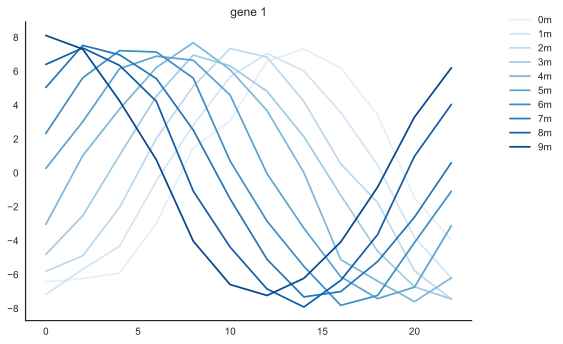

In [4]:
def plot_profile(profile, period, colors, name_gene = ''):
    n_alt = profile.shape[0]
    resolution = profile.shape[1]
    for idx_alt in range(n_alt):
        plt.plot(np.linspace(0, period, resolution, endpoint = False), profile[idx_alt,:].T, '-' ,   
                 color = colors[idx_alt], markersize=10, label = str(idx_alt)+'m')
    plt.legend(bbox_to_anchor=(1.2, 1.05))
    plt.title(name_gene)
    sn.despine()
    plt.show()
    plt.close()
    

#set conditions parameters
n_alt = 10
altitude = range(n_alt)
colors = sn.color_palette("Blues", n_alt) 

#set signal parameters
period = 24
resolution = 12


#generate a hundred profiles and store them in a dict
l_genes = []
dic_profile = {}
for i in range(100):
    gene_name = 'gene' + str(i)
    dic_profile[gene_name] = build_data(period, resolution, n_alt)
    l_genes.append(gene_name)

plot_profile(dic_profile['gene1'], period, colors, name_gene = 'gene 1')

### Complex transformation

Now that we have the data, we can make a linear regression for each altitude of each profile to find out the corresponding phase and amplitude. In practice, we do not use the regression with: $$y_t = A\cos(\omega t + \phi)$$ Indeed, this regression is not linear for the $\phi$ coefficient. Therefore, we use: $$y_t = a\cos(\omega t) + b\sin(\omega t)$$ 

The two formula are perfectly equivalent, with:

$$
\left\{
    \begin{array}{ll}
      A = \sqrt{a^2+b^2}\\
      \phi = \text{arctan2}(b,a)
    \end{array}
  \right.
$$
  
We first implement a small class to do the linear regression (using the one from, for example, SciKit Learn, would yield exactly the same result).

In [5]:
class LinearRegression():
    def __init__(self, Y, dic_X):
        """
        Y: observations vector
        dic_X: design matrix
        """
        self.Y = Y[:,np.newaxis]
        self.dic_X = dic_X
        self.n = len(Y)

    def make_regression(self, chosen_predictors, no_intercept = False):
        p = len(chosen_predictors)
        #create design matrix
        X = np.ones(self.n)[:,None].T
        for pred in chosen_predictors:
            X = np.vstack( (X, self.dic_X[pred]) )
        if no_intercept:
            X = np.delete(X,0,0)
        #make X a matrix with predictors as horizontal vectors
        X = X.T
        X2_inv = np.linalg.inv(X.T @ X)
        #get coef matrix
        B =  X2_inv @ X.T @ self.Y
        #get predictions
        Y_pred = X@B
        #compute s
        s2 =  (1/(self.n-p)) * ((self.Y - Y_pred).T @ (self.Y - Y_pred))
        #compute SE Parameters
        SE = (s2 * X2_inv)**0.5
        return X, B, SE, Y_pred

We can then do the linear regression for each amplitude of each profile, and store the resulting oscillatory signal as a complex number:

In [6]:
w = 2*np.pi/period
Xt = np.linspace(0, period, resolution, endpoint = False)
dic_predictor = {'x': np.cos(w*Xt) , 'y': np.sin(w*Xt)}
dic_complex_data = {}
for gene, profile in dic_profile.items():
    l_complex = []
    for idx_specie in range(n_alt):
        Y = np.squeeze(np.array(profile[idx_specie,:]))
        chosen_predictors =['x','y']
        X, B, SE, Y_pred = LinearRegression(Y, dic_predictor).make_regression(chosen_predictors)
        phase = np.arctan2(B[2], B[1] )%(2*np.pi)
        amp = np.sqrt(B[2]**2+ B[1]**2)
        l_complex.append(amp * np.exp(1j*phase))
    dic_complex_data[gene] = l_complex

/Users/cdroin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


Just to check that everything went right, we can see how well the regressed signal fits the data:

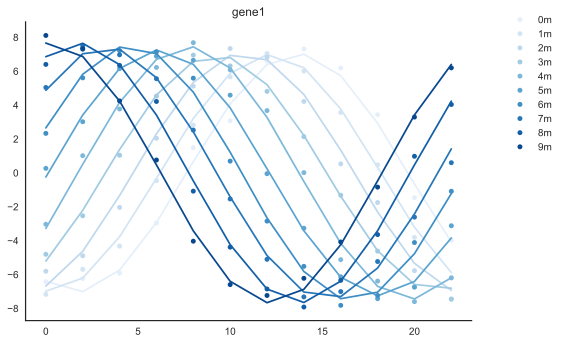

In [7]:
#check that the regression is properly done
def build_profile_from_complex(l_comp, n_alt, resolution):
    y = np.zeros((n_alt,resolution))
    w = 2*np.pi/24
    #rhythmic part first
    for x in range(n_alt):
        for t in range(resolution):
            a = np.abs(l_comp[x])*np.cos(np.angle(l_comp[x]))
            b = np.abs(l_comp[x])*np.sin(np.angle(l_comp[x]))
            y[x,t] = a*np.cos(w*t*2)+b*np.sin(w*t*2)
    return y


def plot_profile_with_fit(profile, fit, period, resolution, colors, name_gene = ''):
    n_alt = profile.shape[0]
    resolution = profile.shape[1]
    for idx_alt in range(n_alt):
        plt.plot(np.linspace(0, period, resolution, endpoint = False), profile[idx_alt,:].T, '.' ,   
                 color = colors[idx_alt], markersize=10, label = str(idx_alt) + 'm')
        plt.plot(np.linspace(0, period, resolution, endpoint = False), fit[idx_alt,:].T, '-' ,   
                 color = colors[idx_alt], )
    plt.legend(bbox_to_anchor=(1.2, 1.05))
    plt.title(name_gene)
    sn.despine()
    plt.show()
    plt.close()
    

gene = "gene1"
profile = dic_profile[gene]
l_complex = dic_complex_data[gene]
fit = build_profile_from_complex(l_complex, n_alt, resolution)
plot_profile_with_fit(profile, fit, period, resolution, colors, name_gene = gene)


Same thing in polar coordinates:

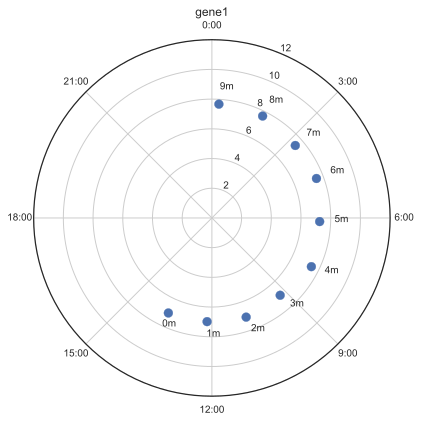

In [8]:
l_complex = dic_complex_data[gene]
l_r = np.array([np.abs(z) for z in l_complex])
l_theta = np.array([np.angle(x) for x in l_complex])


#scatter plot
fig = plt.figure(figsize=(6,6))    
ax = fig.add_subplot(111, projection='polar')    

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)
#ax.set_rlabel_position(60)  # get radial labels away from plotted line

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)
ax.scatter(l_theta, l_r, s = 80)
ax.set_ylim([0,12.])
for alt, (theta, r) in enumerate(zip(l_theta, l_r)): 
    ax.annotate(str(alt)+'m', (theta, r+1), fontsize = 10)
plt.title(gene)
plt.tight_layout()
plt.show()
plt.close()

### The complex SVD

It's now time to get our hands dirty and look at what the SVD actually does to our dataset. Let's see what the matrices outputed by the function `np.linalg.svd` look like.

In [9]:
X = np.array([dic_complex_data[gene] for gene in l_genes]).squeeze()
     
print('X shape', X.shape)
U, S, V = np.linalg.svd(X)
print('U shape',U.shape)
print('S shape',S.shape)
print('V shape',V.shape)

X shape (100, 10)
U shape (100, 100)
S shape (10,)
V shape (10, 10)


The dimensions are as expected: 10 conditions for the altitude, and 100 samples corresponding to the genes. Note that the matrix $\mathbf {U}$ has 100 columns due to the way the SVD is done, but since only the 10 first singular values are non-zero, only the 10 first columns of $\mathbf{U}$ are actually used for the reconstruction. As a sanity check, let's ensure that the original matrix can be rebuilt:

In [10]:
X_rebuilt = np.dot(U[:, :n_alt] * S, V)
print(X_rebuilt[:2,:2])
print(X[:2,:2])

[[-0.69898916-0.07742656j -1.55629805+0.20736233j]
 [-6.39822319-2.92988921j -6.9800212 -0.32355964j]]
[[-0.69898916-0.07742656j -1.55629805+0.20736233j]
 [-6.39822319-2.92988921j -6.9800212 -0.32355964j]]


Finally, we can check that the matrix V is indeed unitary:

In [11]:
print(abs(np.sqrt(np.sum(V[0,:]**2))))

0.9806631495767649


Now that we've understood that the complex SVD provides the transformation we're looking for, let's fiddle a bit with it. The first thing we can do is try to see how well we can approximate a given profile depending on the number of principal axes we decide to keep.

Let's start be defining two functions: one to rebuild a gene profile with a given number of kept components (i.e. principal axes), and one to plot the rebuilt profile against the original one.

In [12]:
def rebuild(u,s,v, n_component, first_component = 0):
    return np.sum( [np.dot( u[:,i][:,np.newaxis]*s[i], v[i,:][:,np.newaxis].T) for i in range(first_component, n_component) ], axis = 0) 

def plot_gene(name_gene, y_formatted_svd, title = "", plot_data = True):
    cmap = matplotlib.cm.get_cmap('rainbow')
    color = [cmap(x) for x in np.linspace(0,1,n_alt,endpoint = True)]
    #get fit prediction
    l_complex = dic_complex_data[name_gene]  
    y = build_profile_from_complex(l_complex, n_alt, resolution)
    for x in range(0,n_alt,1):
        if plot_data:
            plt.plot(np.linspace(0,period,resolution, endpoint = False), y[x,:], label = 'model x='+str(int(x)), color = color[int(x)], lw = 2, )
        plt.plot(np.linspace(0,period,resolution, endpoint = False), y_svd[x,:], '--',label = 'svd x='+str(int(x)), color = color[int(x)], lw = 2)
    plt.xlim([-0.5,24])
    plt.xlabel("Time")
    plt.ylabel("Expression")
    plt.title(title)
    sn.despine()
    plt.show()
    plt.close()

Let's now see what kind of results we get for the reconstruction.

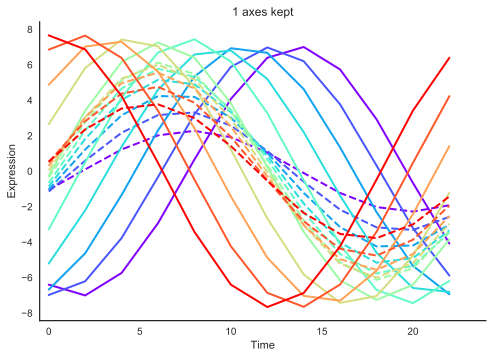

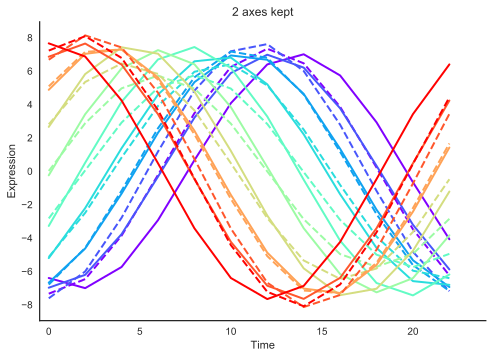

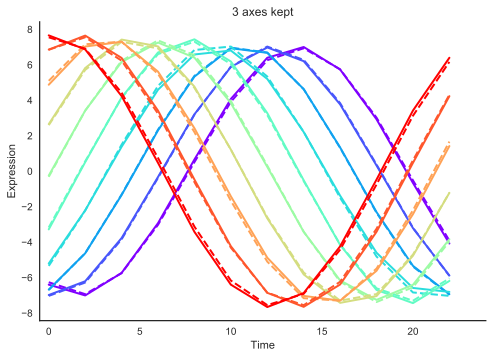

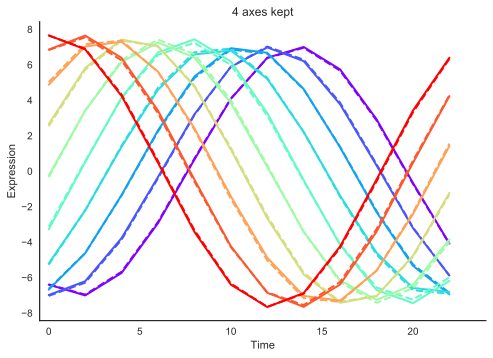

In [13]:
idx_gene = 1
for n_comp in range(1,5):
    l_pr_complex = rebuild(U,S,V,n_comp)
    gene_complex = l_pr_complex[idx_gene]
    y_svd = build_profile_from_complex(gene_complex, n_alt, resolution)
    plot_gene("gene"+str(idx_gene), y_svd, title = str(n_comp) + " axes kept")

Apparently, two or three components are already more than enough to almost perfectly recover the original signal... Normally, this should be reflected in the relative weights of the singular values, just like for a PCA. Let's try to see if that's indeed the case: let's plot the eigenvalues to understand how the variance is distributed among the prinipal axes.

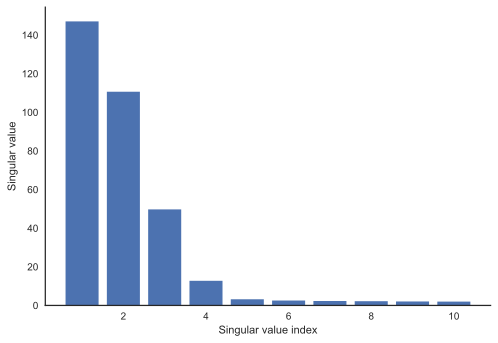

43.975759845029074% of the variance is explained by the first PC


In [14]:
plt.bar(range(1,n_alt+1), S[:n_alt])
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
#plt.yscale('log')
sn.despine()
plt.show()
plt.close()
print(str(np.abs(S[0]/np.sum(S)) *100) + '% of the variance is explained by the first PC' )

Indeed, most of the variance is contained the first 2-3 components. Now let's plot the scores of $\mathbf {U\Sigma}$ next to the principal directions, i.e. the columns of $\mathbf {V}$, to understand what happens during the reconstruction.

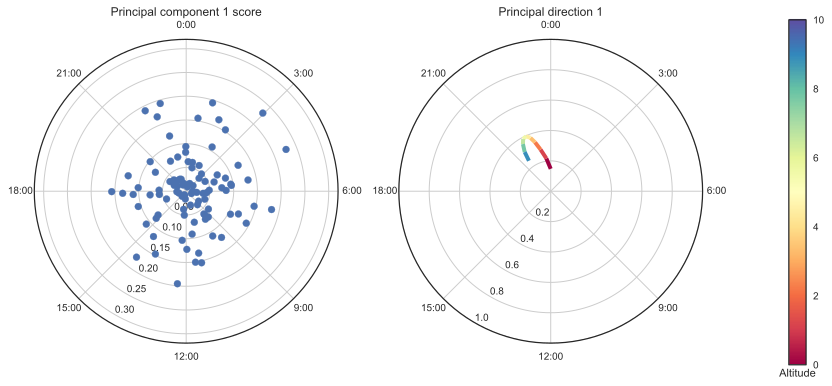

In [15]:
def plot_SVD(U,V, idx_component):    
    fig = plt.figure(figsize=(12,6))

    ax1 = fig.add_subplot(121,projection='polar')
    l_angle = np.angle(U[:,idx_component-1])
    l_r = np.abs(U[:,idx_component-1])
    sc = ax1.scatter(l_angle, l_r, cmap = 'bwr')
    ax1.grid(True)
    # set the lable go clockwise and start from the top
    ax1.set_theta_zero_location("N")
    # clockwise
    ax1.set_theta_direction(-1)
    ax1.set_rlabel_position(210)  # get radial labels away from plotted line
    # set the label
    ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
    ax1.set_xticklabels(ticks)
    ax1.set_title("Principal component " + str(idx_component)+ " score", va='bottom')

    ax2 = fig.add_subplot(122,projection='polar')
    l_angle = np.angle(V[idx_component-1,:])
    l_r = np.abs(V[idx_component-1,:])
    lc = LineCollection([ [[theta1, r1],[theta2, r2]] for theta1, r1, theta2, r2 in zip(l_angle[:-1], l_r[:-1],l_angle[1:], l_r[1:] ) ], array= np.linspace(0,n_alt,n_alt,endpoint = True), cmap='Spectral', lw = 4)
    ax2.add_collection(lc)
    ax2.grid(True)
    # set the lable go clockwise and start from the top
    ax2.set_theta_zero_location("N")
    # clockwise
    ax2.set_theta_direction(-1)
    ax2.set_rlabel_position(210)  # get radial labels away from plotted line
    # set the label
    ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
    ax2.set_xticklabels(ticks)
    ax2.set_title("Principal direction " + str(idx_component), va='bottom')
    
    cb_ax = fig.add_axes([1., 0.1, 0.02, 0.8])
    cbar = fig.colorbar(lc, cax=cb_ax)
    cbar.ax.set_xlabel('Altitude')
   
    #plt.tight_layout()
    plt.show()
    
plot_SVD(U,V, 1)

Let's give a bit of interpretation to this figure. Each point on the left polar plot represent the score of the first component of a given gene $g$. In practice, it's a complex number, which can be converted into an oscillatory signal.

To rebuild the original profile of $g$, one needs to know how the phase and amplitude of $g$ evolves with the altitude. In the general case, this is given by the sum of the cartesian products of the $\mathbf U\Sigma$ scores of the gene $g$ with the different principal direction ($\mathbf V$ columns):

$$\mathbf{M}_g =  \sum_i (\Sigma \mathbf U)_{i,g} \otimes \mathbf V_i$$

However, in the plot above, we only consider the first component, that is, we look at:

$$\mathbf{M}_g \simeq  (\Sigma \mathbf U)_{1,g} \otimes \mathbf V_1$$

In practice, we observe that the first principal direction does not explain much: it almost doesn't evolve neither en terms or phase or amplitude with the altitude. This means that the first component should more or less be considered as a rythmic intercept: when multiplied by the scores, it provides the overall amplitude and phase of the gene profile, without explaining the variations among the different altitudes.

Let's now try to understand what the second principal direction explains.

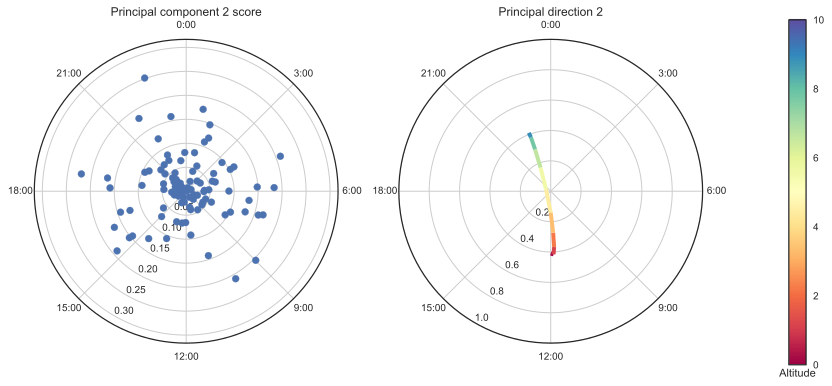

In [16]:
plot_SVD(U,V, 2)

This component may be more useful to explain how the amplitude changes with the altitude. Indeed, it corresponds to a signal with a progressively decreasing amplitude, leading to a phase reversal at about altitude 5m, and then progressively increasing amplitude.

Let's now look at the 3rd and 4th principal directions.

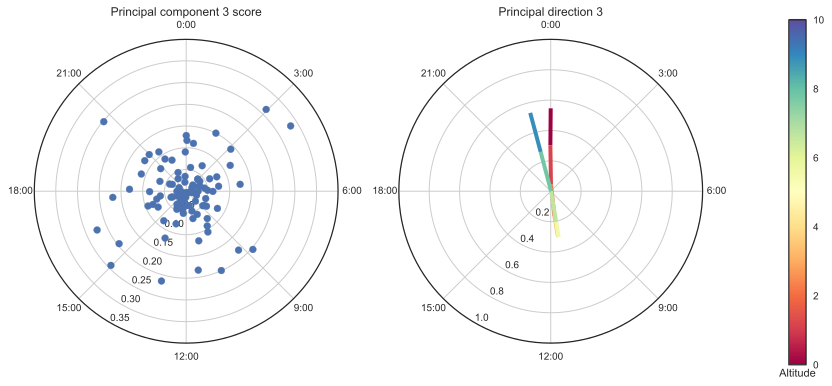

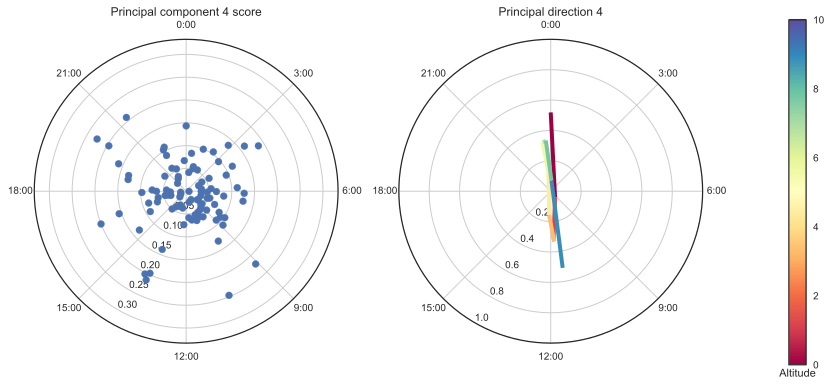

In [17]:
plot_SVD(U,V, 3)
plot_SVD(U,V, 4)

We acknowledge that for both directions, the amplitude and the phase vary a lot. Note that the phase variation is not that obvious because it happens near the critical point of zero-amplitude, but it's indeed here.

Let's look at the reconstruction of a given gene to better understand what happens. Let's plot the signal profiles corresponding to the first, second, third and fourth component.

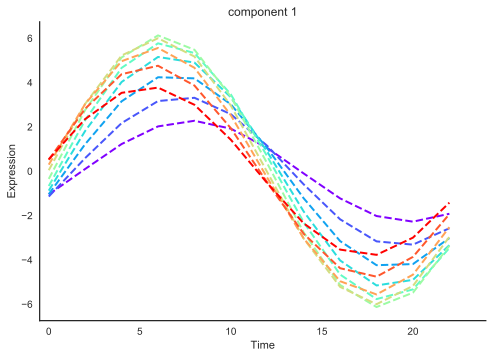

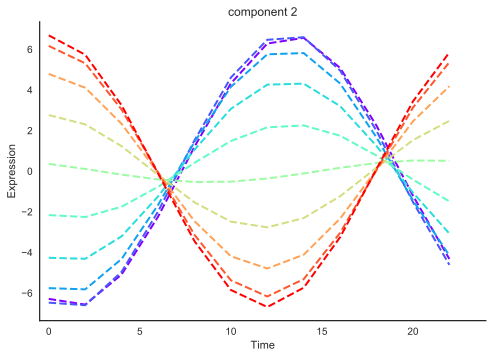

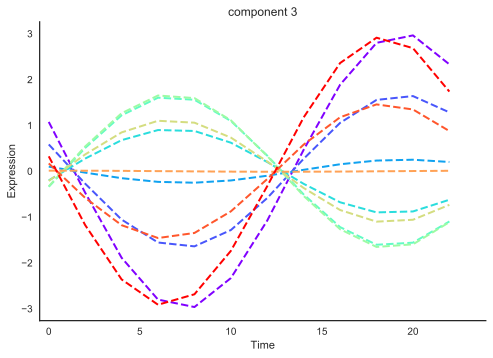

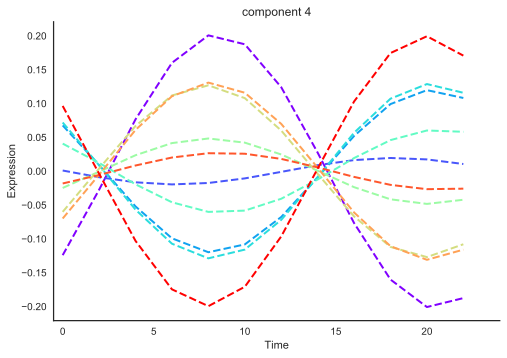

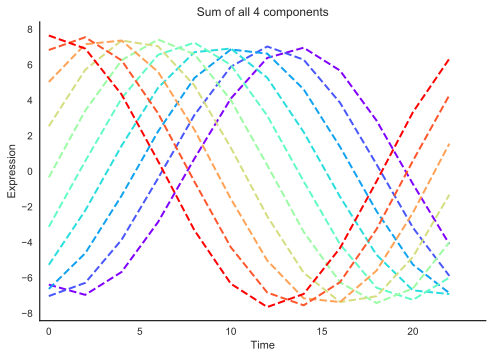

In [18]:
#reconstruction component by component
idx_gene = 1
for n_comp in range(1,5):
    l_pr_complex = rebuild(U,S,V,n_comp, n_comp-1)
    gene_complex = l_pr_complex[idx_gene]
    y_svd = build_profile_from_complex(gene_complex, n_alt, resolution)
    plot_gene("gene1", y_svd, title = "component " + str(n_comp), plot_data = False)

#final reconstruction
l_pr_complex = rebuild(U,S,V,n_comp, 0)
gene_complex = l_pr_complex[idx_gene]
y_svd = build_profile_from_complex(gene_complex, n_alt, resolution)
plot_gene("gene1", y_svd, title = "Sum of all 4 components", plot_data = False)

So this is how the complex SVD works: it decomposes an oscillating set of signal into components, which also happen to be set of oscillating signals. The sum of these sets of signals lead to the final profiles, because the sum of harmonic function is always an harmonic function. However, the different components will change the phase and/or the amplitude of the final profile in different ways.

Now, this method is really easy to implement and enables to easily vizualize how the variance of the dataset can be decomposed. However, it has the same drawbacks as PCA: the principal directions are not always easy to interpret. For this dataset, since the data has been built in a very specific way, it happens not to be that bad: the first direction sets the general phase/amplitude, the second direction sets how the amplitude evolve with the altitude, and the third and fourth directions set how the amplitude and phase evolve with the altitude. But clearly, even in this ideal case, it's not super readable. For instance, a phase shift with no amplitude drift would be very hard to interpret from the 3rd and 4th component. So, can one do better?

Actually, just like with a PCA, if we already know in which way we want to decompose the variance of our data, it's way easier to directly do a linear regression. But this will be the topic of another notebook!